# 用线性回归（最小二乘法）训练SAT-GPA成绩预测模型


## 1.数据集说明

一个最简单的入门的线性回归的 machine learn 的课程，通过入学考试成绩（SAT）来推测这些学生的毕业成绩（GPA），数据源都是来自于特定时间的真实数据。

## 2.代码实现

使用最小二乘法（LeastSquares）实现线性回归算法。

### 2.1 训练模型

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# 加载数据集
# 如果这里是很大的数据源，这里可以著名从那里下载即可，比如您可以下载这个 data.csv 从 http://xxxx.com/data.csv 处下载
data = pd.read_csv('data.csv')

In [3]:
# 打印数据集
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
# 加载 y 和 x
# 此处 y 是毕业的成绩 x1 为 sat 的称
# 最终的公式 y=f(x)
y = data['GPA']
x1 = data['SAT']

In [5]:
# 打印 y 
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [6]:
# 打印 x
x1

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

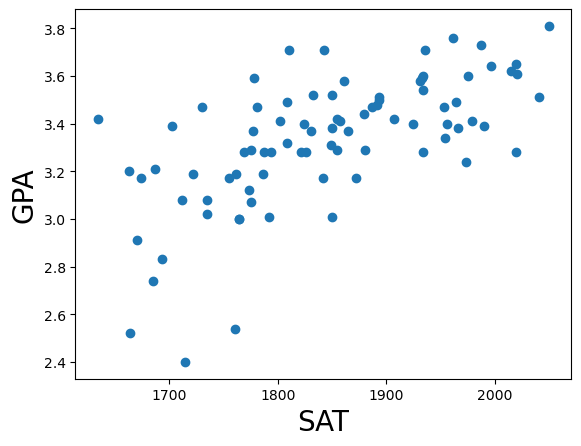

In [7]:
# 绘制训练集的座标点
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [8]:
# 查看数据集中的各项关键值
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [9]:
# 调用 python 来使用最小2乘法来得到 slop 值
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           7.20e-11
Time:                        11:04:45   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

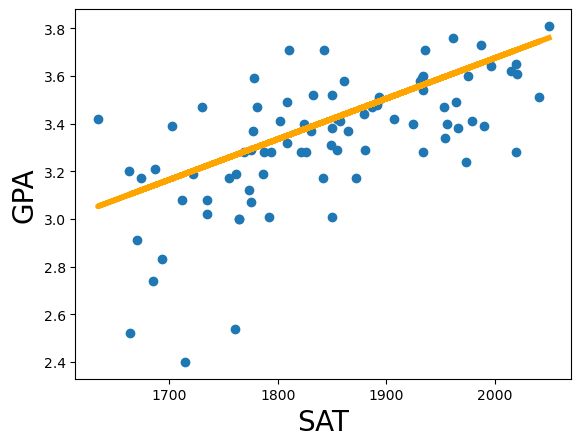

In [10]:
# 绘制回归线
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### 2.2测试模型

In [11]:
# 定义一个预测函数
def prediction(x):
    print(0.0017 * x + 0.275)

In [12]:
# 预测 2000 分的 SAT 的 GPA
prediction(2000)

3.675
